<a href="https://www.kaggle.com/code/andrey36912/homework-mood-4-part-2?scriptVersionId=190786873" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [46]:
import pandas as pd
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds2.csv",
                 usecols=['carat', 'depth', 'price']
                )

df.head()

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335


In [48]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X.values).to(device)
        self.y = torch.FloatTensor(y.values).to(device)
        self.y = self.y.reshape(-1, 1)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
X = df.drop(columns=['price'])
y = df['price']
dataset = MyDataset(X, y)

In [49]:
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

X_batch, y_batch = next(iter(dataloader))
print(X_batch.shape)
print(y_batch.shape)

torch.Size([32, 2])
torch.Size([32, 1])


In [50]:
model = nn.Sequential(
     nn.Linear(2, 4),
     nn.ReLU(),
     nn.Linear(4, 1)
)
model

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [51]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [52]:
num_epochs = 10
losses = []
for epoch in range(num_epochs):
    losses_ = []
    for X_batch, y_batch in dataloader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        losses_.append(loss.item())
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
losses.append(np.mean(losses_))

if epoch % 1 == 0:
    print(f'loss={losses[-1]}')

loss=15914794.797004744


(0.0, 25000000.0)

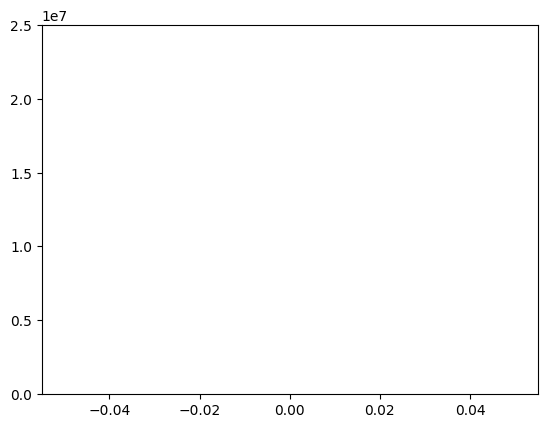

In [53]:
plt.plot(losses)
plt.ylim(0, 0.25*1e8)